In [15]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import path
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union
from datetime import datetime, timedelta
import time
import warnings
import statsmodels.api as sm
import datetime
import math
from scipy.ndimage.interpolation import shift
import shapely.wkt


warnings.filterwarnings('ignore')
import seaborn as sns
from my_functions import sat_vap_press, vap_press, hot_dry_windy, haines

## Helper Function

In [16]:
def plot_correlations(df_rave, df_merra, df_pws, df_esi, df_cpc,df_imerg, fig_title):
    #concatenate all the dataframes
    df_all = pd.concat([df_merra.drop(columns=['Unnamed: 0']),
                        df_pws.drop(columns=['Unnamed: 0', 'day']),
                        df_esi.drop(columns=['Unnamed: 0', 'day']),
                        df_cpc.drop(columns=['Unnamed: 0', 'day']),
                        df_imerg.drop(columns=['Unnamed: 0', 'day']),
                        df_rave[['CO','CO2','OC']]
                    
                    ], axis=1)
    corrMatrix = df_all.corr()
    fig,ax=plt.subplots(figsize=(25,25))
    sns.heatmap(corrMatrix, annot=True,vmin=-1, vmax=1, cmap='seismic', annot_kws={'fontsize':10})
    plt.title(fig_title, fontsize=20)
    plt.show()

In [33]:
def plot_correlations_rave_merra(df_rave, df_merra, fig_title):
    #concatenate all the dataframes
    df_all = pd.concat([df_merra.drop(columns=['Unnamed: 0']),
                        df_rave[['CO','CO2','OC']]], axis=1)
    corrMatrix = df_all.corr()
    fig,ax=plt.subplots(figsize=(25,25))
    sns.heatmap(corrMatrix, annot=True,vmin=-1, vmax=1, cmap='seismic', annot_kws={'fontsize':10})
    plt.title(fig_title, fontsize=20)
    plt.show()

## Look at Correlations of MERRA with daily moving average

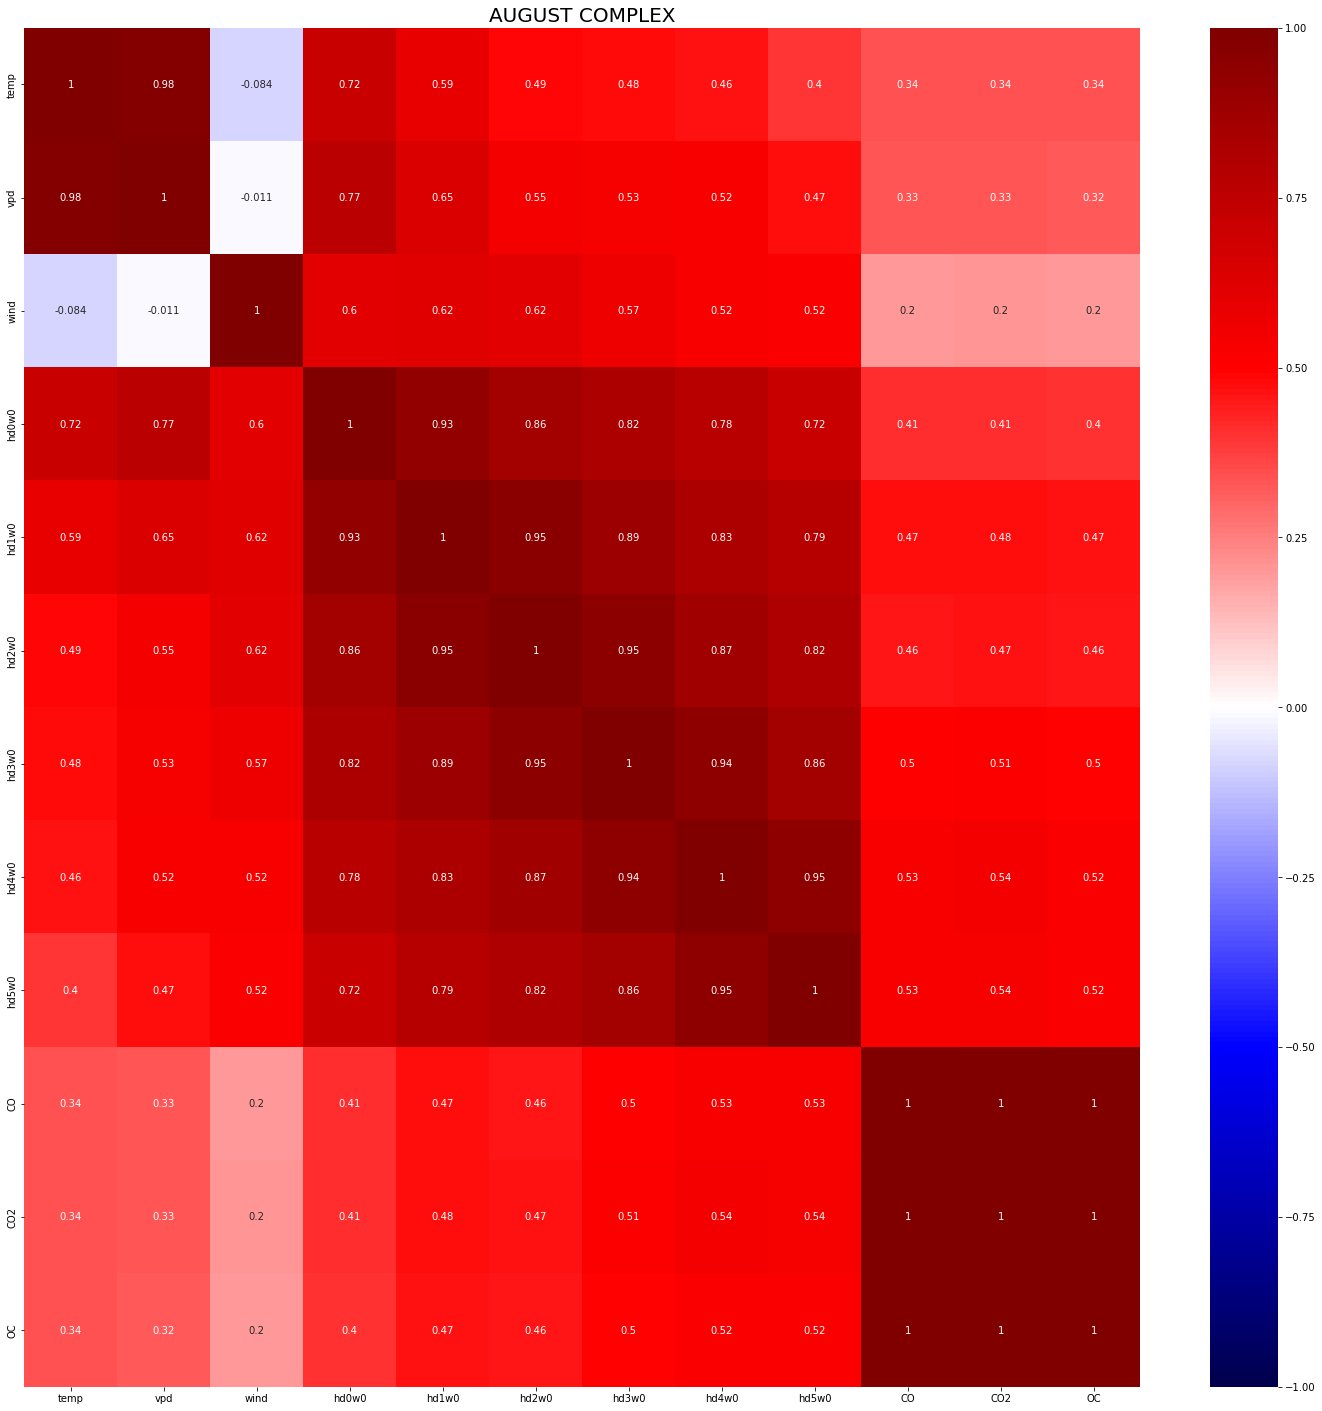

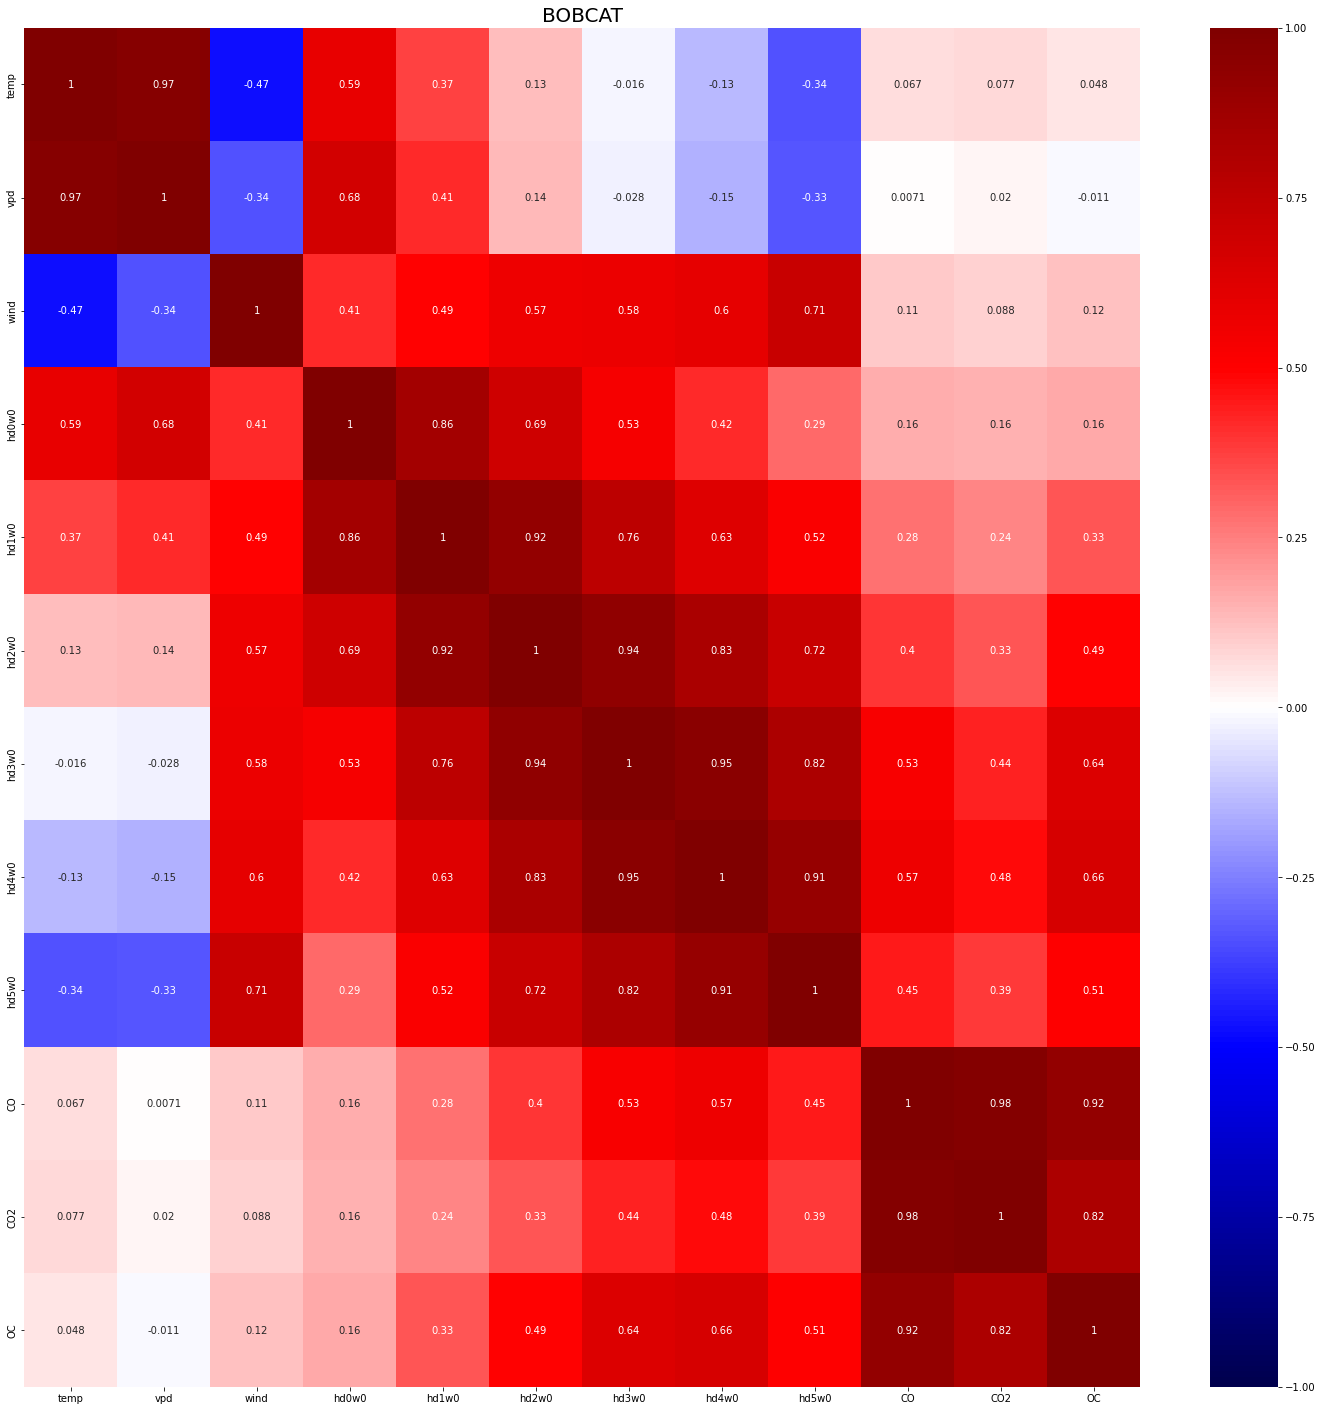

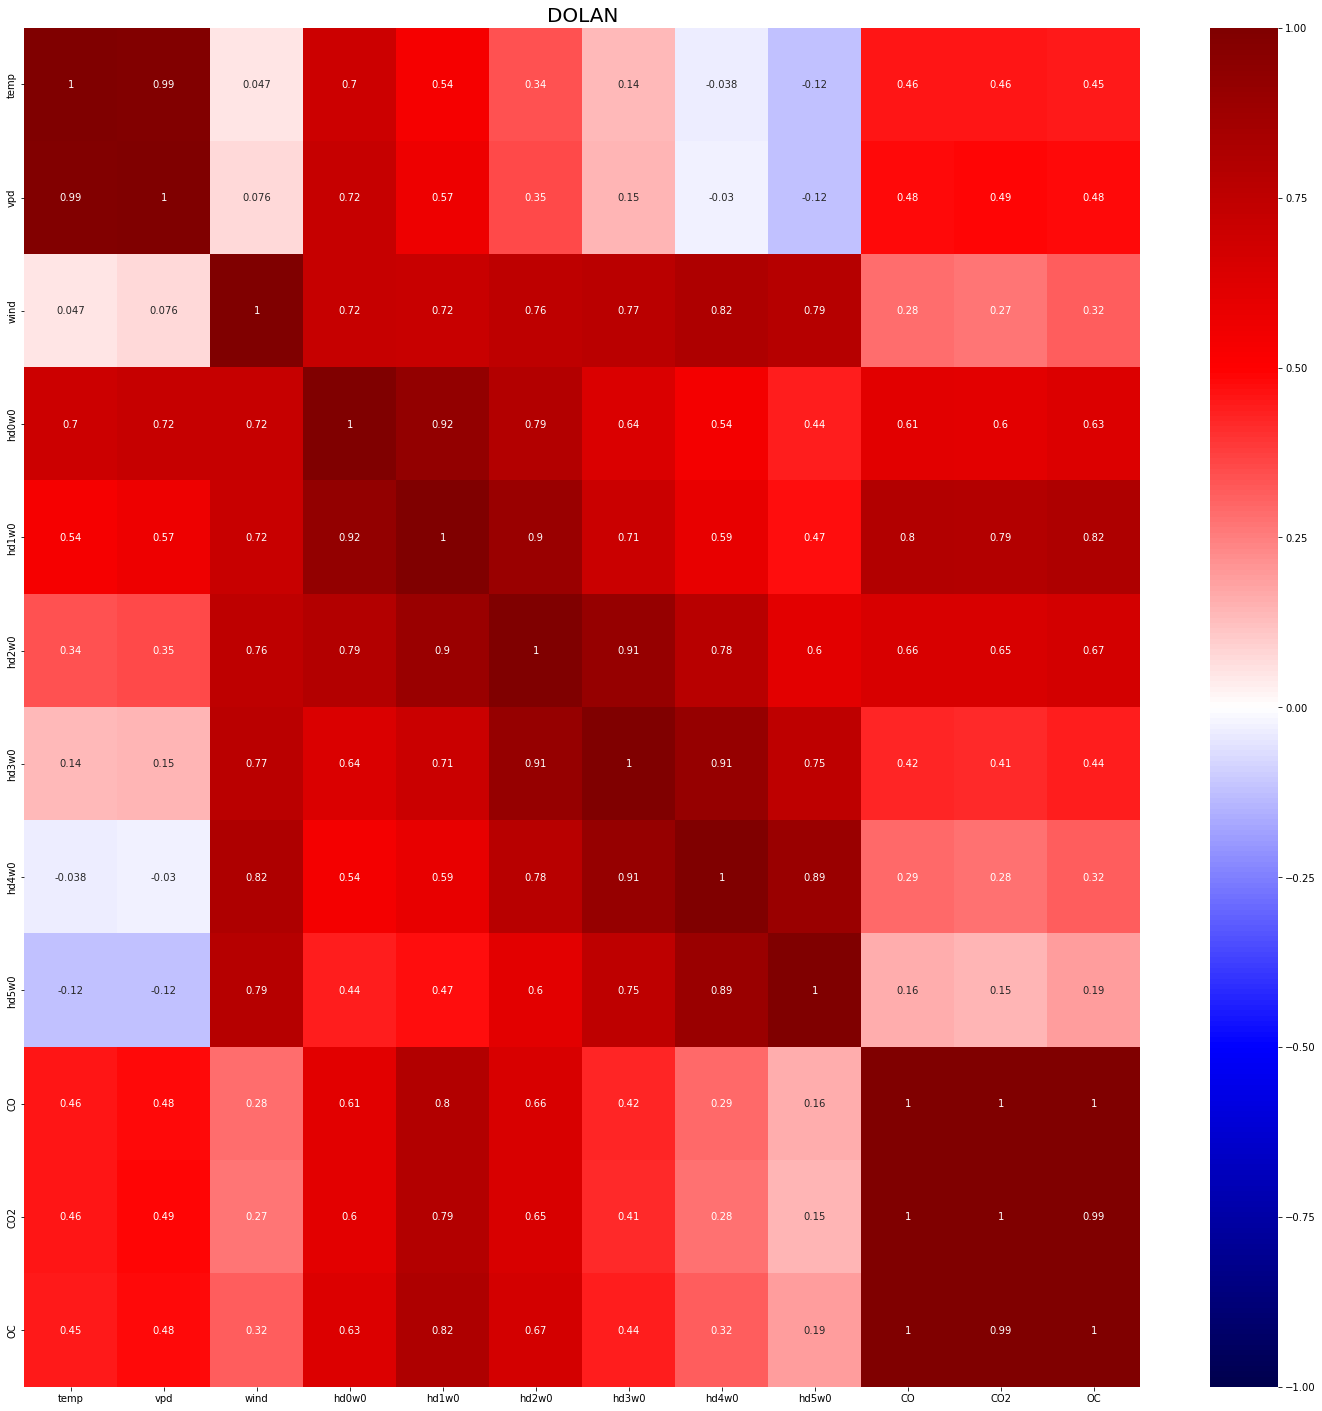

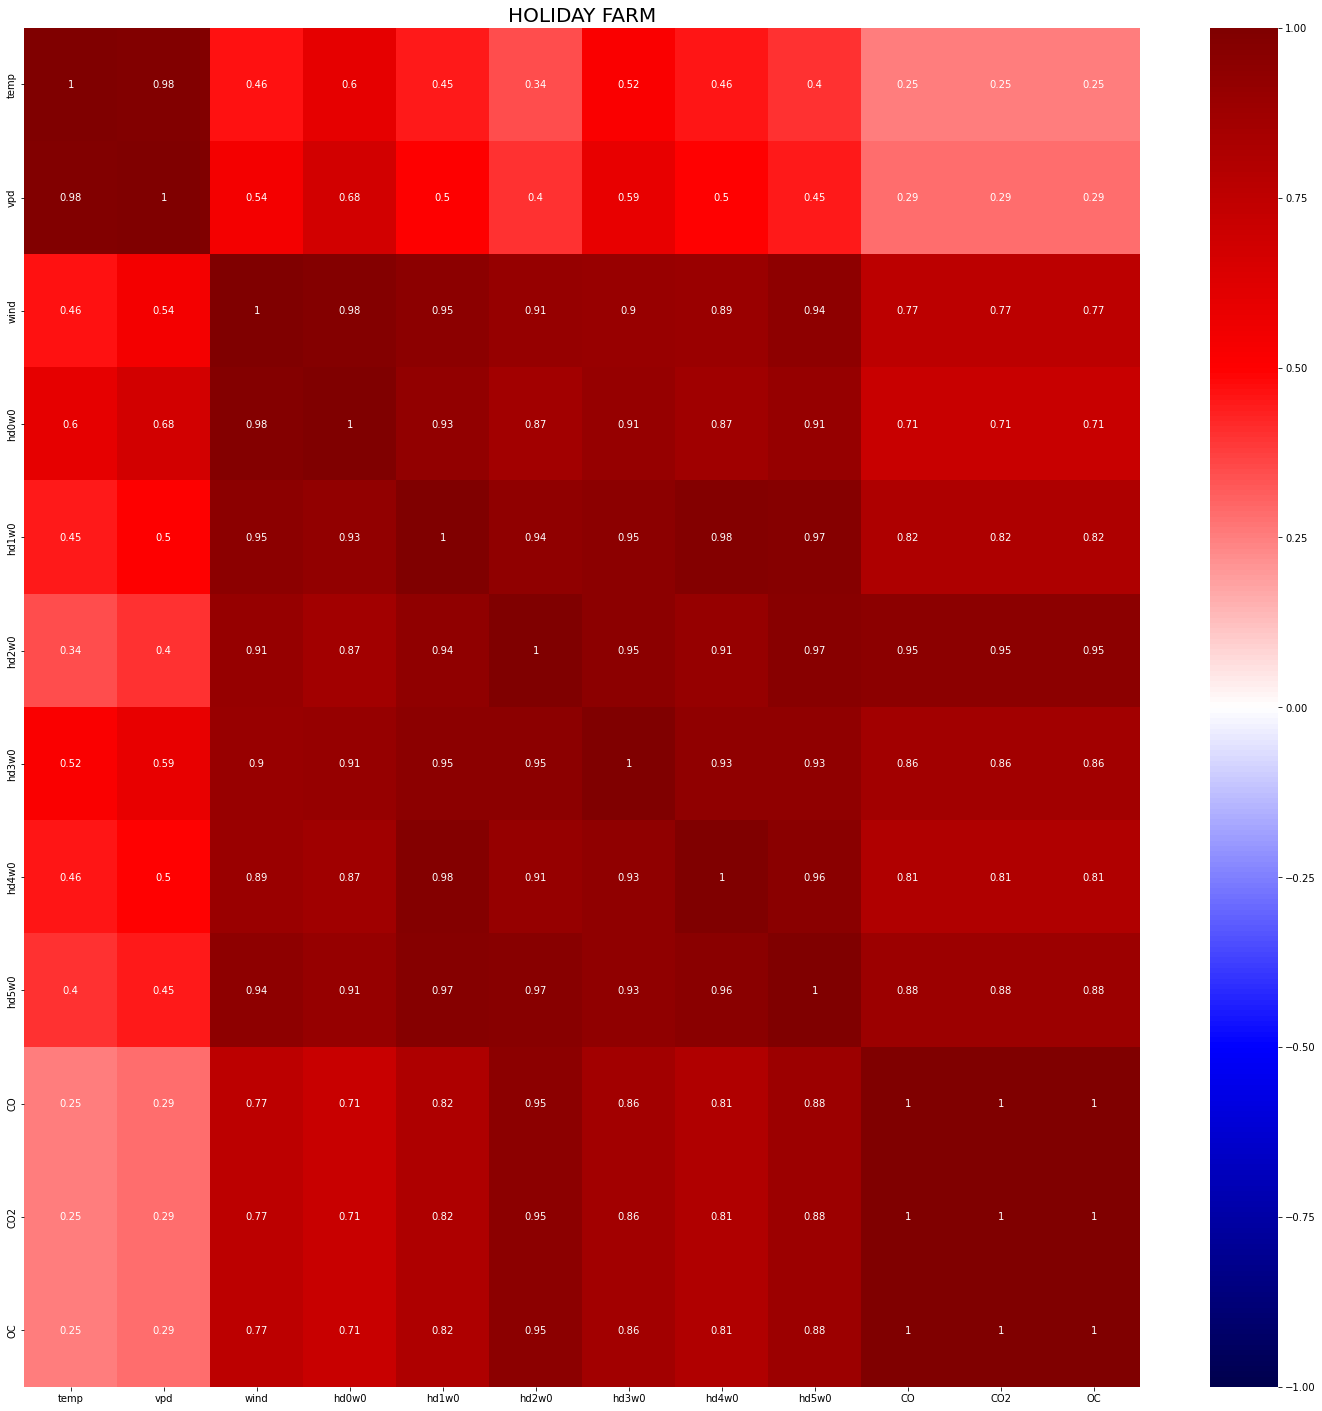

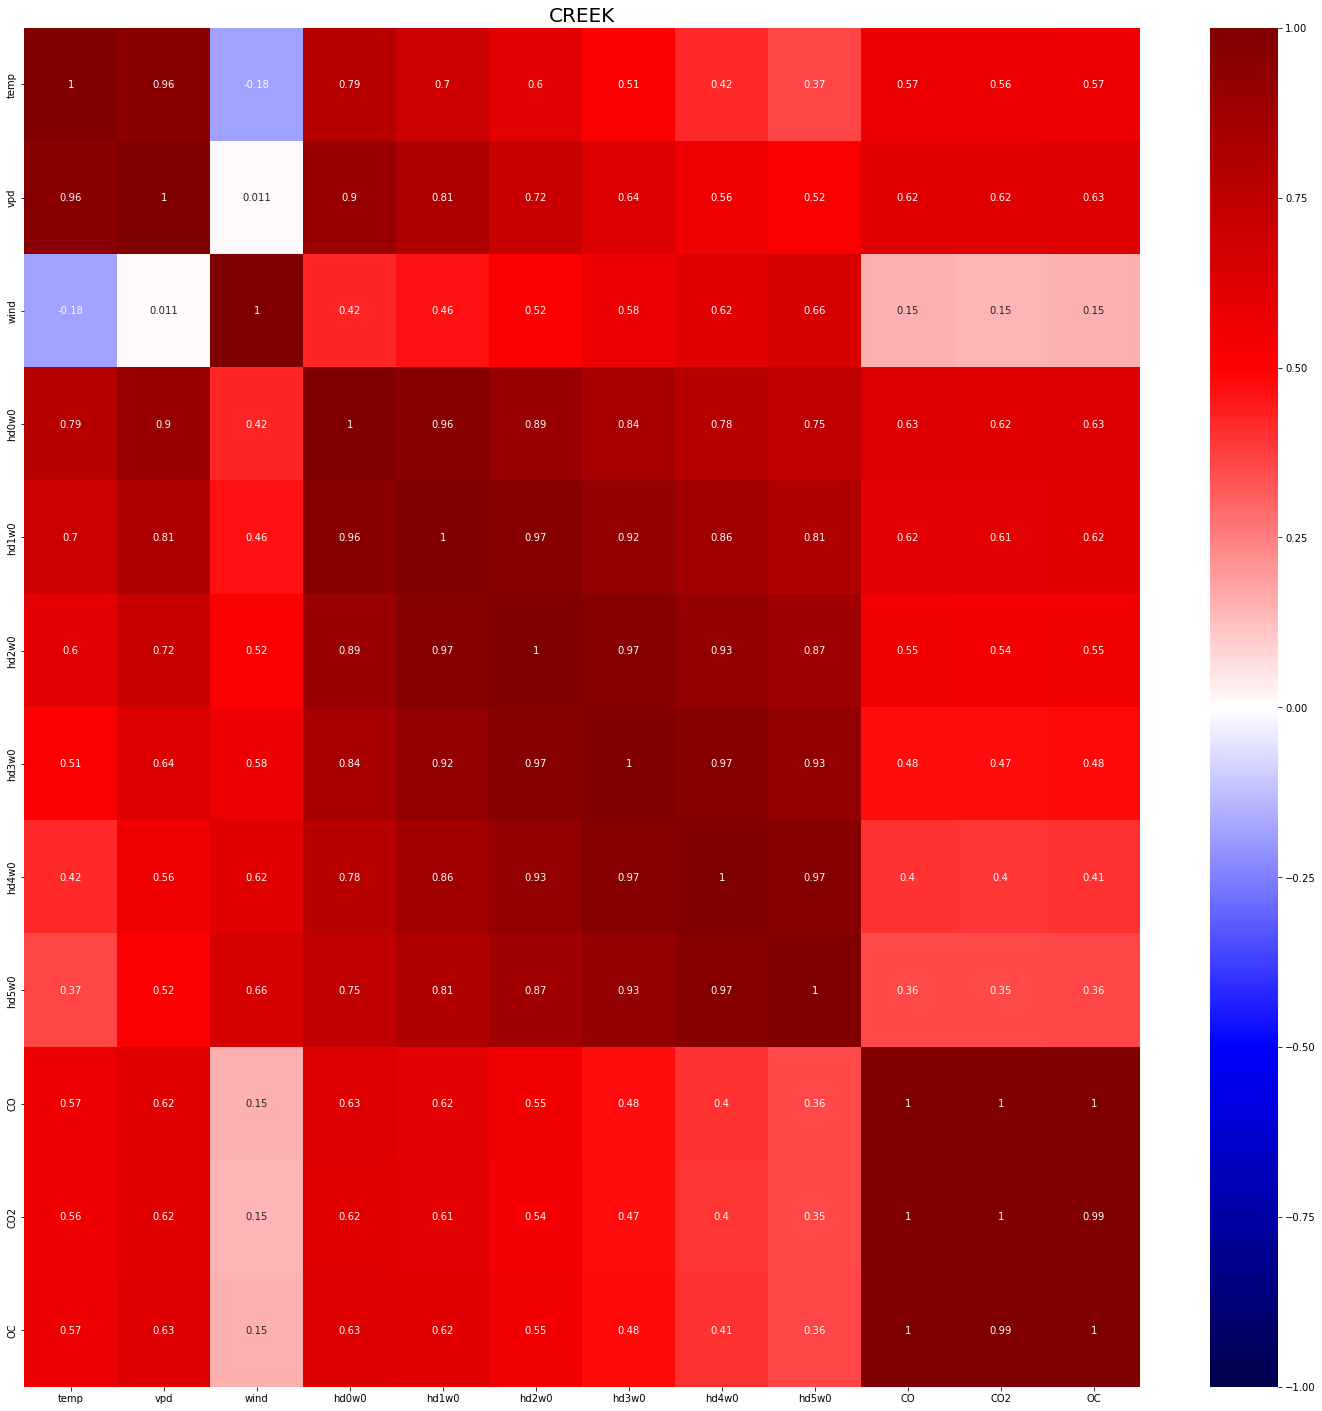

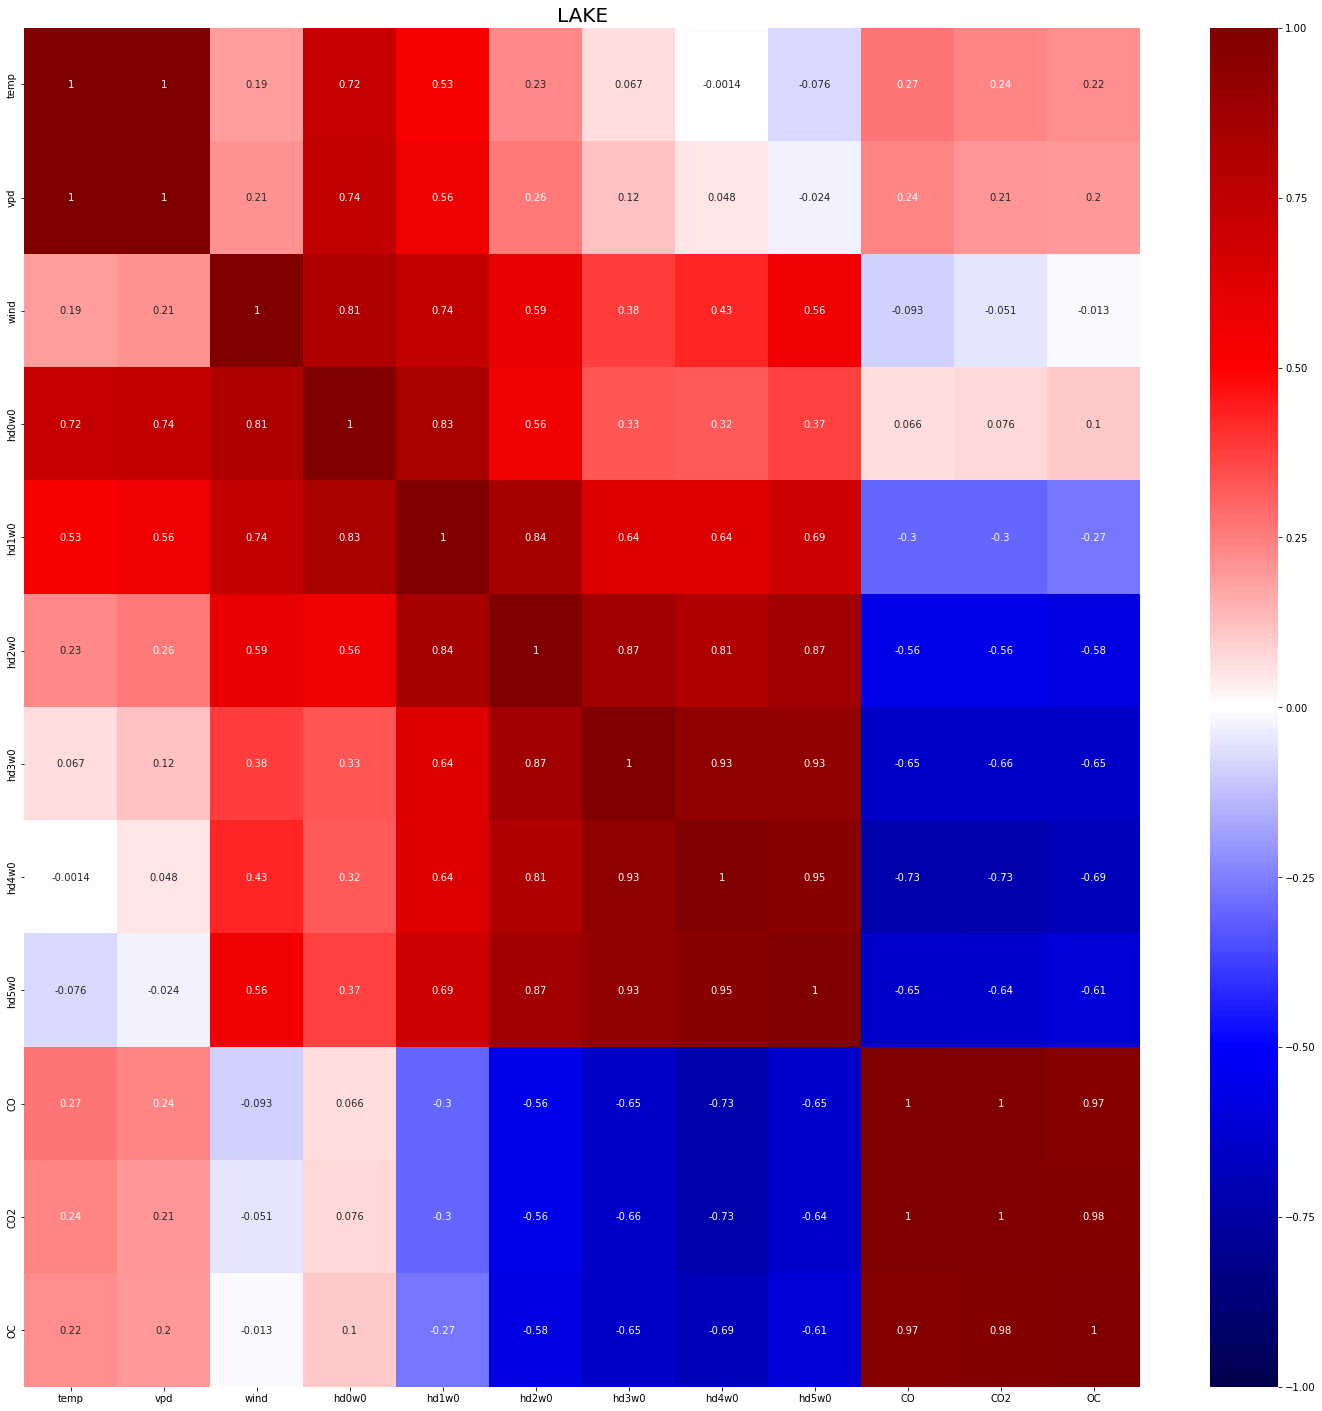

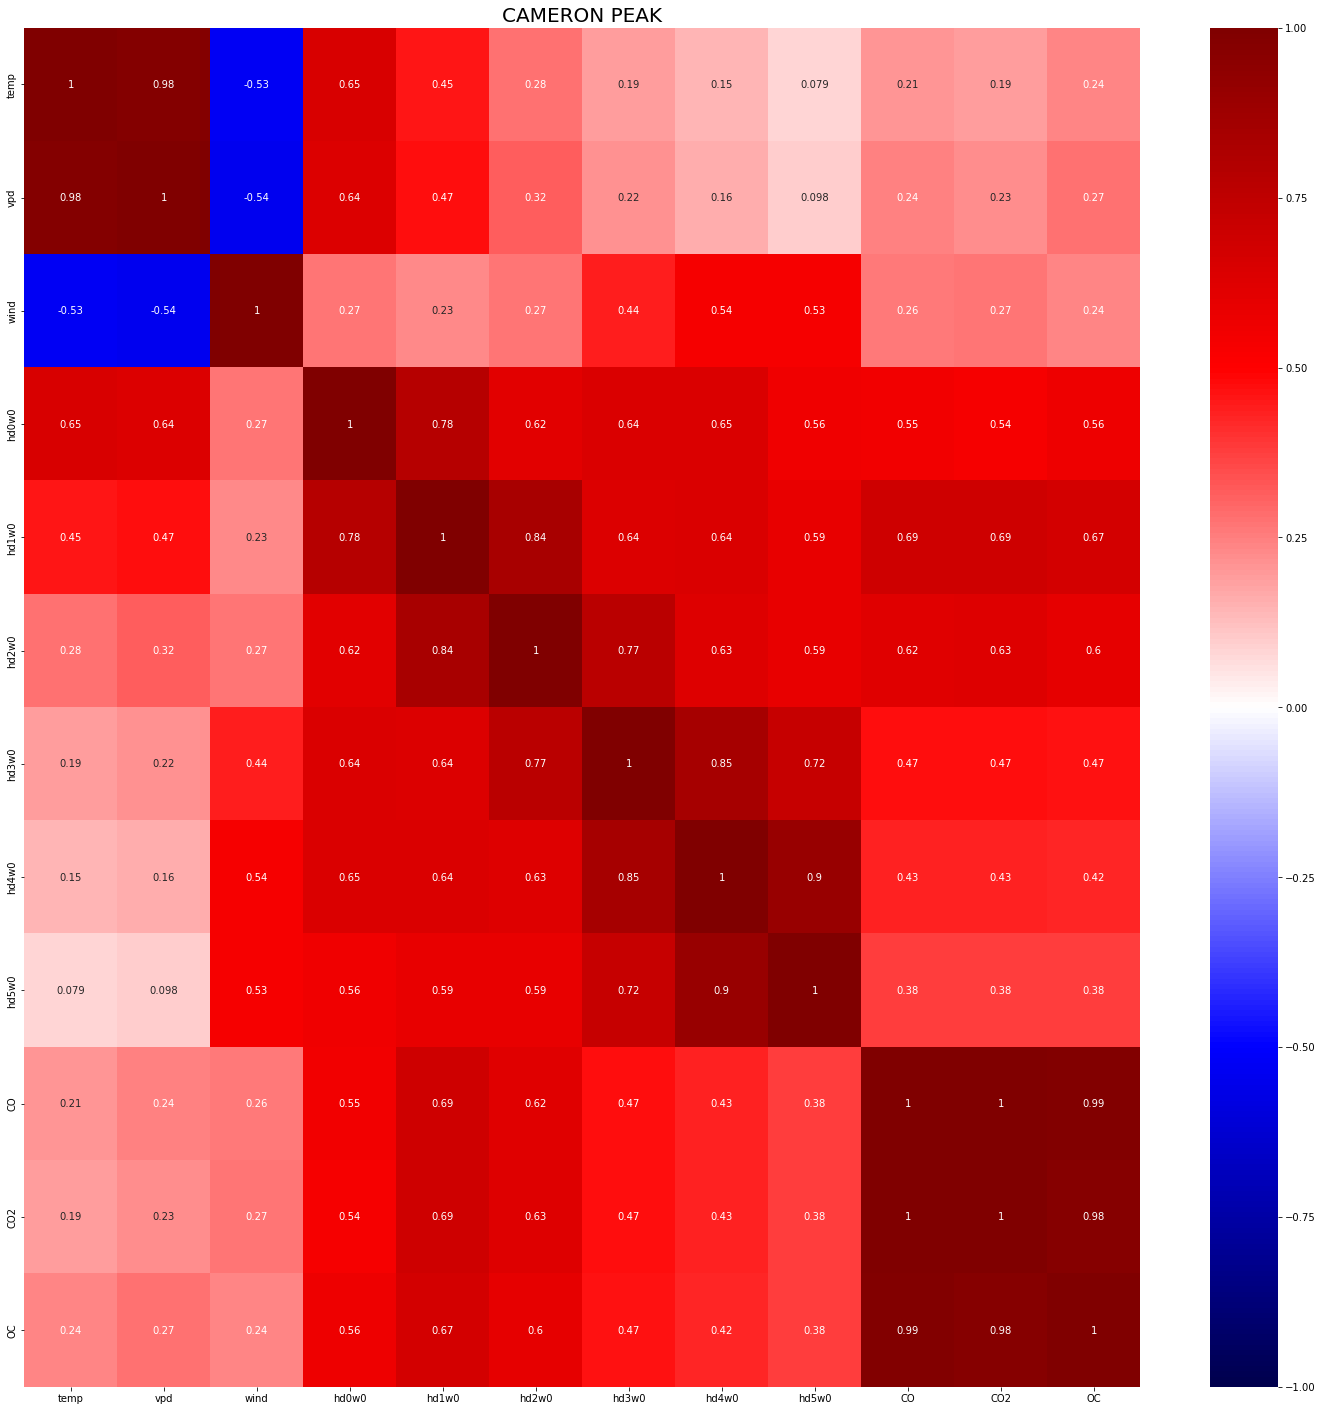

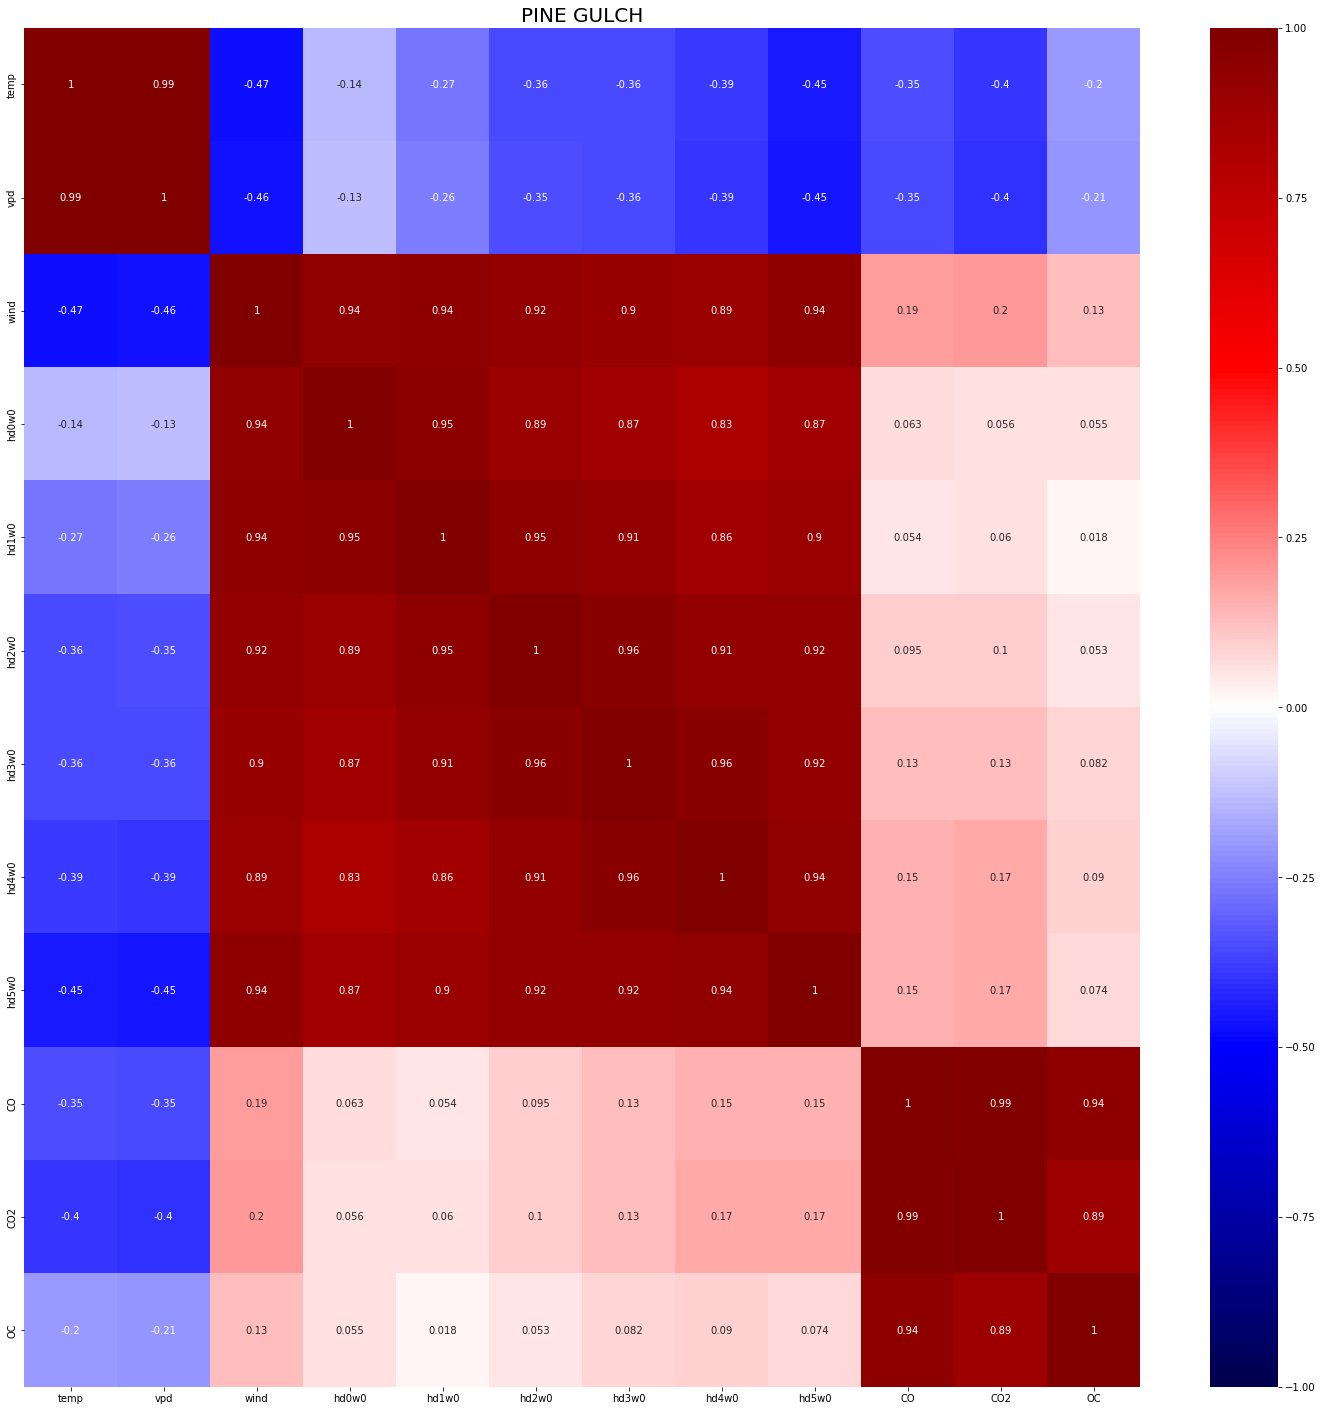

In [34]:
# Correlation plots for all days, all fires
merra_all = pd.DataFrame()
rave_all = pd.DataFrame()
esi_all = pd.DataFrame()
pws_all = pd.DataFrame()
cpc_all = pd.DataFrame()
imerg_all = pd.DataFrame()


fire_incidents = ['AUGUST COMPLEX', 'BOBCAT', 'DOLAN', 'HOLIDAY FARM','CREEK', 'LAKE', 'CAMERON PEAK', 'PINE GULCH']
#fire_incidents=['LAKE']
path_features='/data2/lthapa/ML_daily/fire_features/'

for ii in range(len(fire_incidents)):
    file_prefix = fire_incidents[ii].lower().replace(' ', '_')
    
    #load in rave data
    rave = pd.read_csv(path_features+file_prefix+'_Daily_RAVE_12Z.csv')
    inds_active = np.where(rave['Mean_FRP']>10)[0] #this is the threshold I used at NOAA
    rave=rave.iloc[inds_active]
    
    merra = pd.read_csv(path_features+file_prefix+'_Daily_MERRA_Moving_Average_2_12Z.csv').iloc[inds_active]

    #pws = pd.read_csv(path_features+file_prefix+'_Daily_PWS.csv').iloc[inds_active]  
    #esi = pd.read_csv(path_features+file_prefix+'_Daily_ESI.csv').iloc[inds_active]
    #cpc = pd.read_csv(path_features+file_prefix+'_Daily_FWI_CPC.csv').iloc[inds_active]  
    #imerg = pd.read_csv(path_features+file_prefix+'_Daily_FWI_IMERG.csv').iloc[inds_active]
    
    
    plot_correlations_rave_merra(rave, merra,fire_incidents[ii])
    
    merra_all = pd.concat([merra_all,merra], axis=0)
    rave_all = pd.concat([rave_all,rave], axis=0)
    #esi_all = pd.concat([esi_all,esi], axis=0)
    #pws_all = pd.concat([pws_all,pws], axis=0)
    #cpc_all = pd.concat([cpc_all,cpc], axis=0)
    #imerg_all = pd.concat([imerg_all,imerg], axis=0)


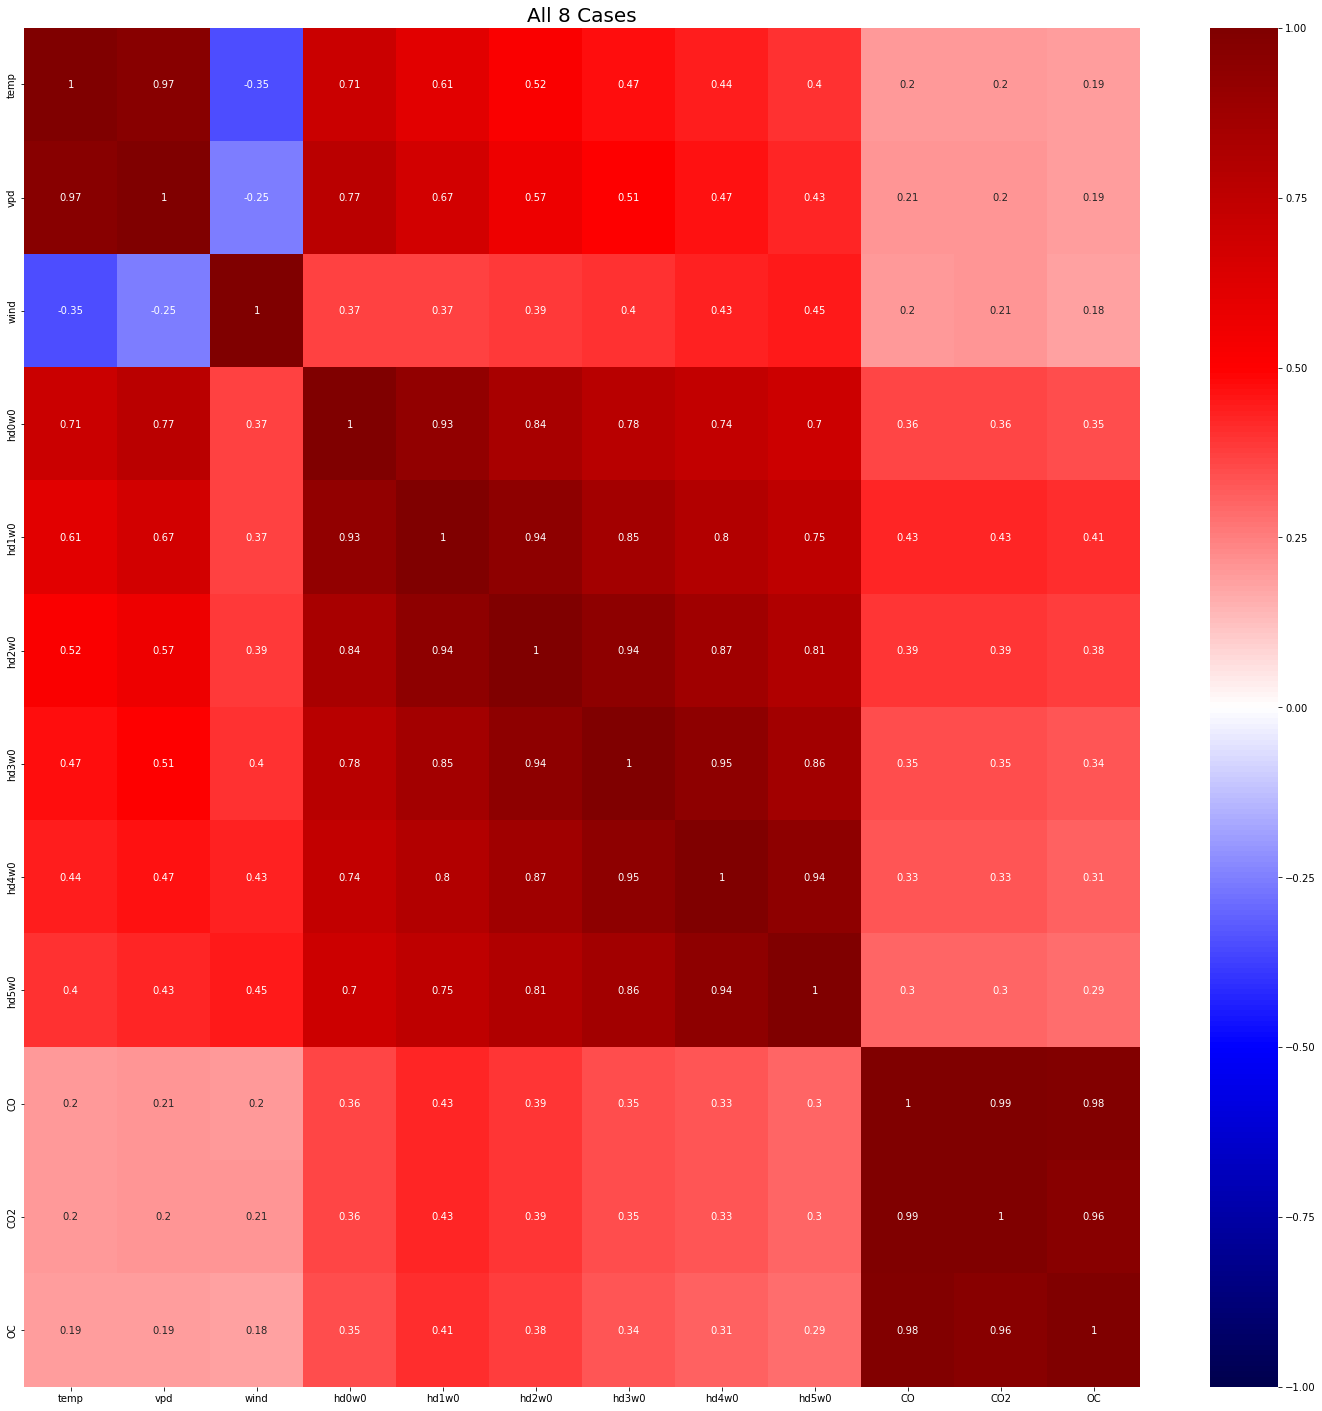

In [35]:
plot_correlations_rave_merra(rave_all, merra_all, 'All 8 Cases')

[ 69  70  71  72  73  74  75  76  77  78  80  81  82  83  84  85  89  91
  93  94  98  99 133 138 212 213 216 217 218 219 220 241]
[  1   2   3  54  55  56  57  58  59  65  66  79  86  87  88  90  92  95
  96  97 108 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 134 135 136 137 139 140 141 142 143 144 145
 146 147 148 149 161 162 165 166 167 168 169 170 171 172 174 175 176 177
 178 179 180 181 182 185 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 214 215 221 223 224 225
 226 229 230 231 233 234 237 238 240 242 265 271 272 280 294 295 304 305]
[  0   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  60  61  62
  63  64  67  68 100 101 102 103 104 105 106 107 109 110 150 151 152 153
 154 155 156 157 158 159 160 163 164 173 183 184 186 187 222 227 

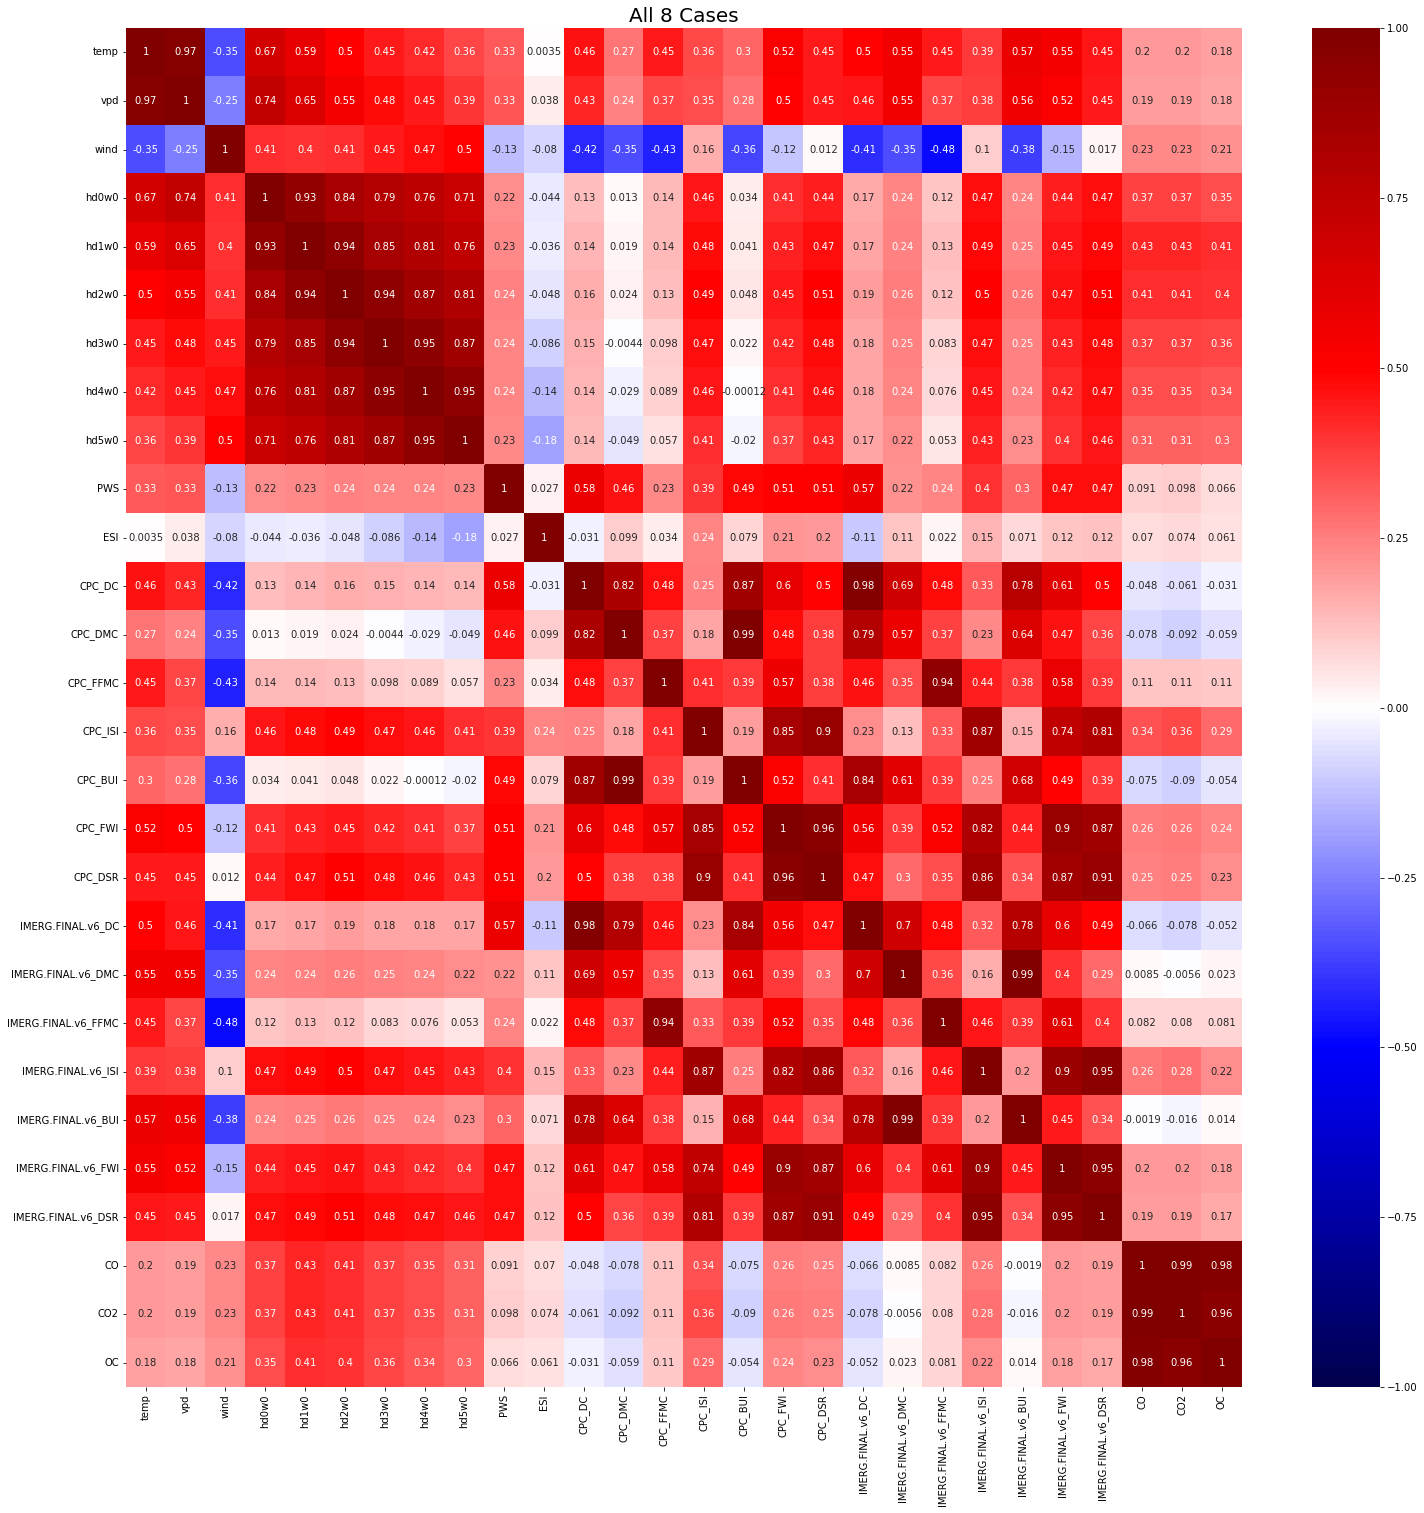

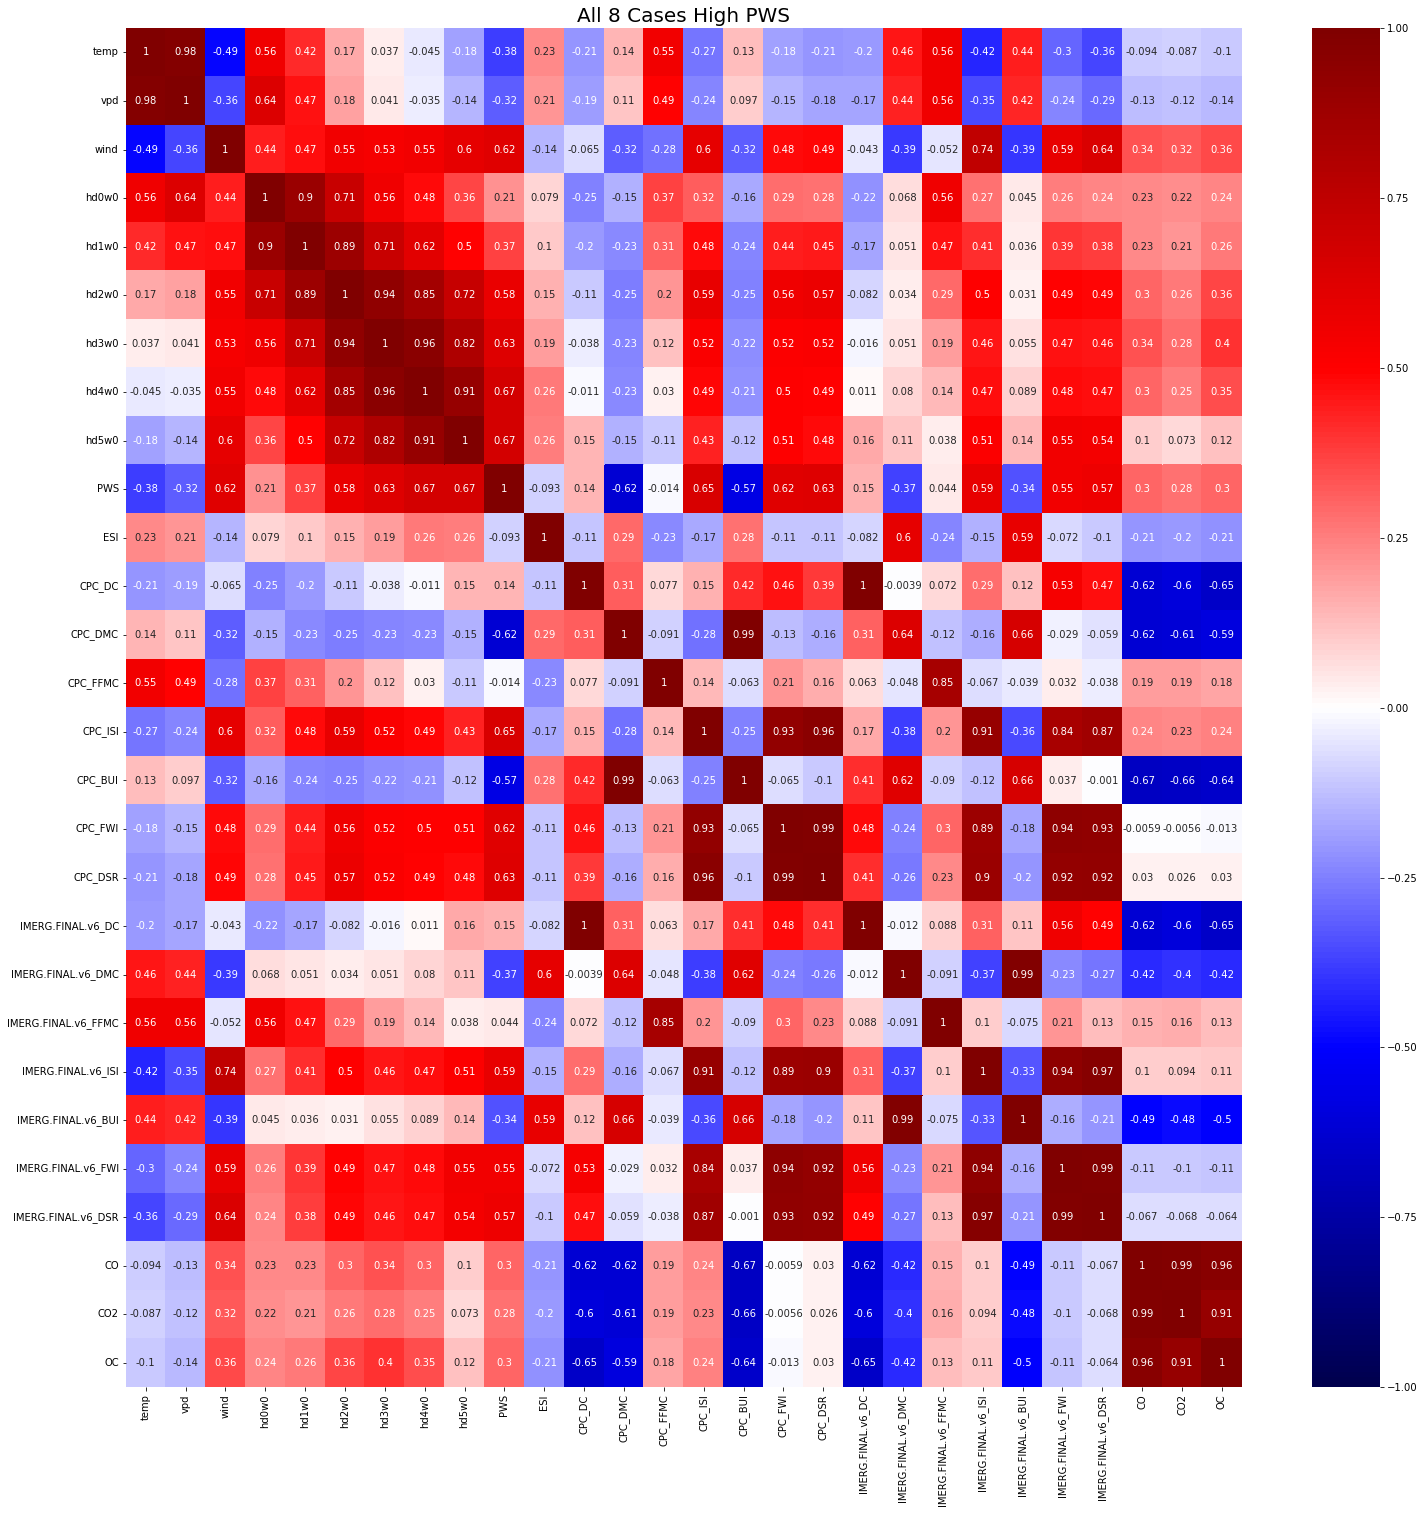

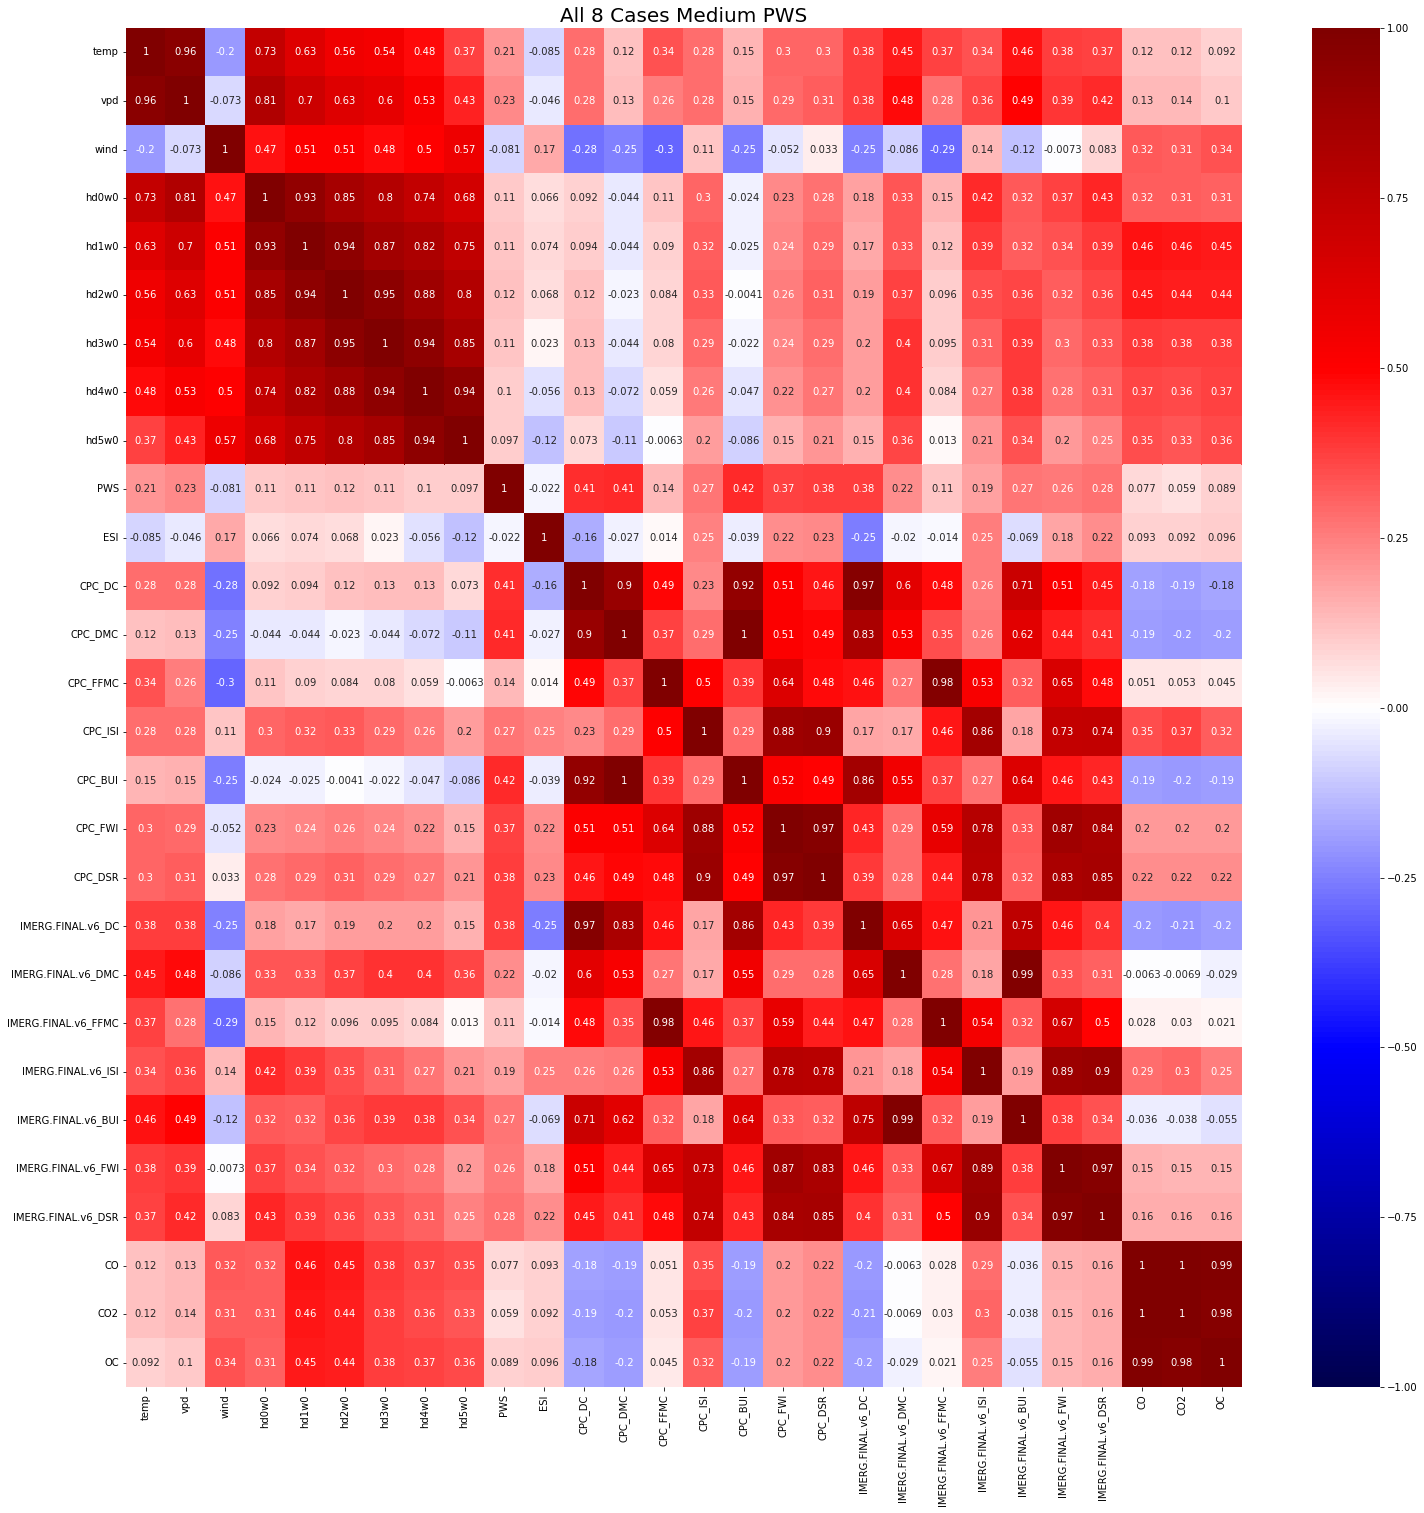

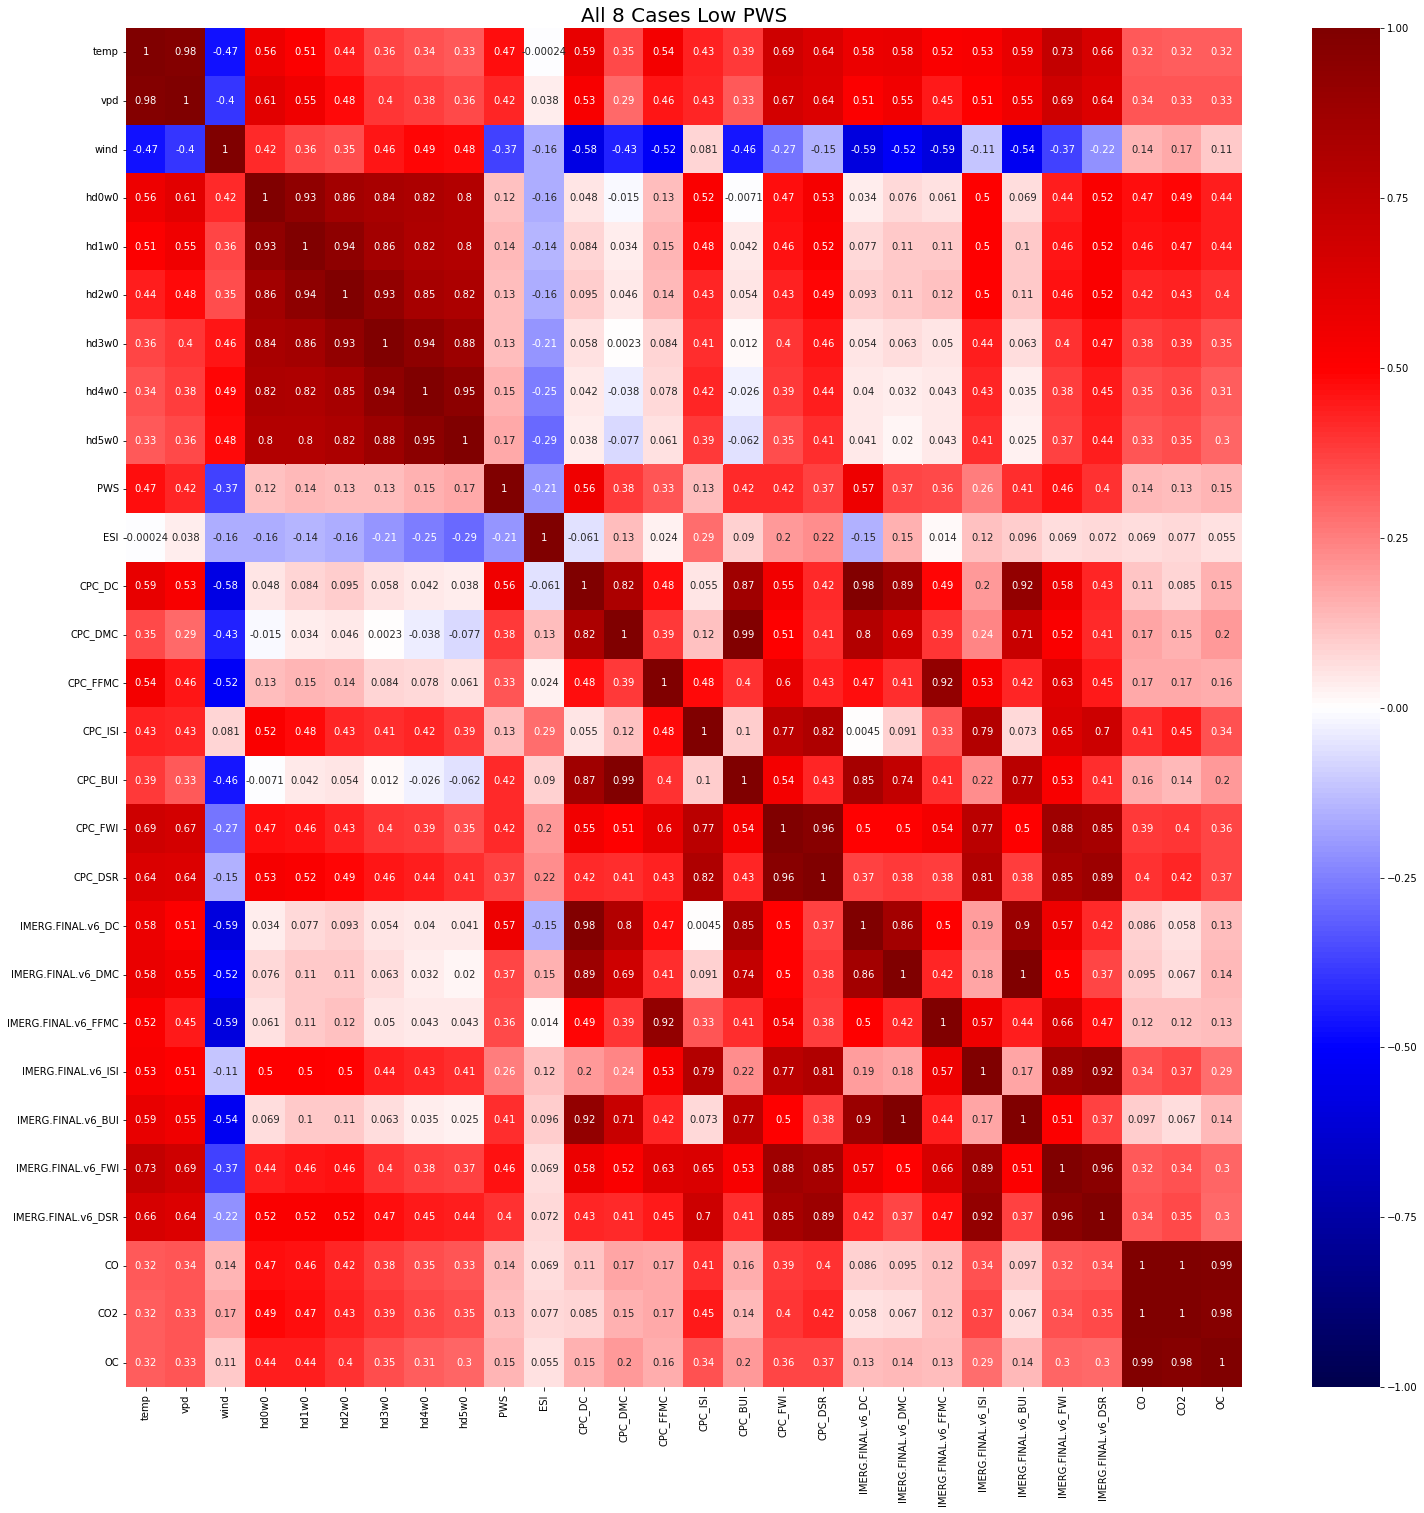

In [68]:
inds_high_pws = np.where(pws_all['PWS']>1.5)[0]
inds_med_pws = np.where((pws_all['PWS']<=1.5)&(pws_all['PWS']>=1))[0]
inds_low_pws = np.where(pws_all['PWS']<1)[0]

print(inds_high_pws)
print(inds_med_pws)
print(inds_low_pws)

plot_correlations(rave_all, merra_all,pws_all,esi_all,cpc_all,imerg_all, 'All 8 Cases')

plot_correlations(rave_all.iloc[inds_high_pws], merra_all.iloc[inds_high_pws],
                  pws_all.iloc[inds_high_pws],esi_all.iloc[inds_high_pws],
                  cpc_all.iloc[inds_high_pws],imerg_all.iloc[inds_high_pws],  'All 8 Cases High PWS')

plot_correlations(rave_all.iloc[inds_med_pws], merra_all.iloc[inds_med_pws],
                  pws_all.iloc[inds_med_pws],esi_all.iloc[inds_med_pws],
                  cpc_all.iloc[inds_med_pws],imerg_all.iloc[inds_med_pws],  'All 8 Cases Medium PWS')

plot_correlations(rave_all.iloc[inds_low_pws], merra_all.iloc[inds_low_pws],
                  pws_all.iloc[inds_low_pws],esi_all.iloc[inds_low_pws],
                  cpc_all.iloc[inds_low_pws],imerg_all.iloc[inds_low_pws],  'All 8 Cases Low PWS')



In [61]:

print(len(inds_high_pws))
print(len(inds_med_pws))
print(len(inds_low_pws))

32
126
148


In [2]:
#plots two lines, on one or on the same axis
# IN: datax, x axis vector (time)
# IN: datay, 2*n vector of the data
# IN: linelabels, string vector of the labels of each line, to go in the legend
# IN: axis labels, labels of the axis
# IN: title, string for title of figire
# IN: twoaxis, if 1 plot data on two separate axes, else plot on the same axis
# OUT: a graph
def plot_twoline(datax, datay, title, linelabels, axislabels, twoaxis):
    fig, ax = plt.subplots(figsize=(20,6)) #set up the figure
    
    if twoaxis==1:
        ax.plot(datax, datay[0,:], 'ro-') # plot the first line
        ax.set_ylabel(axislabels[0], fontsize=24, color='red') 
        ax2=ax.twinx()
        ax2.plot(datax, datay[1,:], 'bo-') #plot the second line
        ax2.set_ylabel(axislabels[1], fontsize=24, color='blue')
        
    else:
        ax.plot(datax, datay[0,:], 'ro-') # plot the first line
        ax.plot(datax, datay[1,:], 'bo-') # plot the second line
        ax.set_ylabel(axislabels, fontsize=24) 
    #print(np.arange(1,len(datax.values),6))
    plt.xticks(np.arange(1,len(datax.values),6))    
    plt.legend(linelabels,fontsize=24)
    plt.title(title,fontsize=24)
    plt.grid()
    plt.show()



0     46.576836
1     44.340810
2     44.880861
3     33.011037
4     30.262443
        ...    
64    15.207183
65    15.054365
66    11.246300
67    25.296232
68    20.695397
Name: vpd, Length: 69, dtype: float64


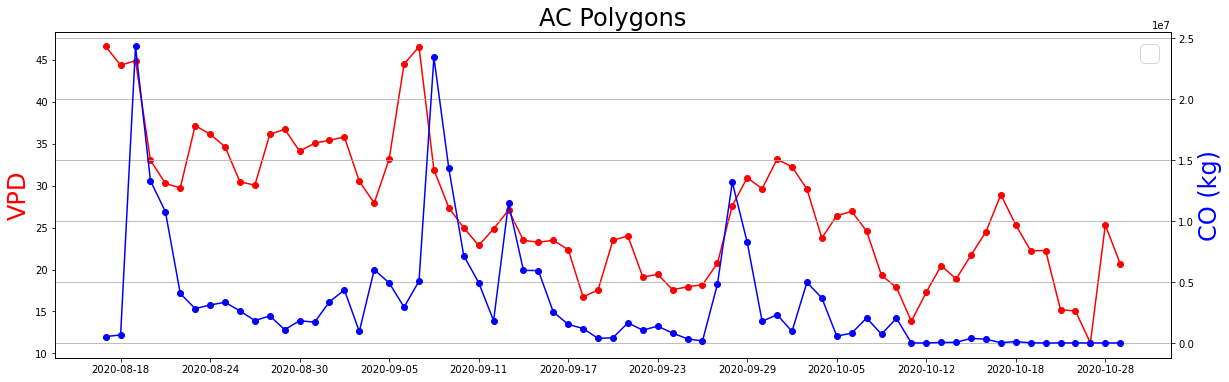

In [14]:
path_features='/data2/lthapa/ML_daily/fire_features/'

rave = pd.read_csv(path_features+'august_complex_Daily_RAVE.csv')
merra = pd.read_csv(path_features+'august_complex_Daily_MERRA_Moving_Average_2.csv')

print(merra['vpd'].iloc[0:69])

plot_twoline(rave['day'], np.stack([merra['vpd'].iloc[0:69], rave['CO']]), 'AC Polygons',\
             [], ['VPD', 'CO (kg)'], 1)